# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [1]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt

%matplotlib inline

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

Заглянув в д/з, из задачи номер 5.6 имеем:
$$ \mathsf{E}(\xi | \mathcal{G}) = \dfrac{e^\lambda(\lambda (n - 1) + 1) - \lambda n - 1}{e^\lambda - 1},$$ 

$$\mathsf{E}(\xi^2 | \mathcal{G}) = \dfrac{e^\lambda (\lambda (n-1)(\lambda(n-1) + 2) + 2) - \lambda n(\lambda n + 2) - 2 }{\lambda^2 (e^\lambda - 1)}$$

In [2]:
def cond_exp(lambd, n):
    return (np.exp(lambd) * (lambd * (n - 1) + 1) - lambd * n - 1) / (lambd * (np.exp(lambd) - 1))

def cond_square_exp(lambd, n):
    down = lambd**2 * (np.exp(lambd) -  1)
    up = (np.exp(lambd) * (lambd * (n - 1) * (lambd * (n - 1) + 2) + 2) - lambd * n * (lambd * n + 2) - 2)
    return  up / down

lambds = [1, 3, 10]
omega = np.linspace(0, 5, 3000)
conditions = [i for i in range(1, 6)]
colors = ['r', 'b', 'g']

###### Плотность распределения

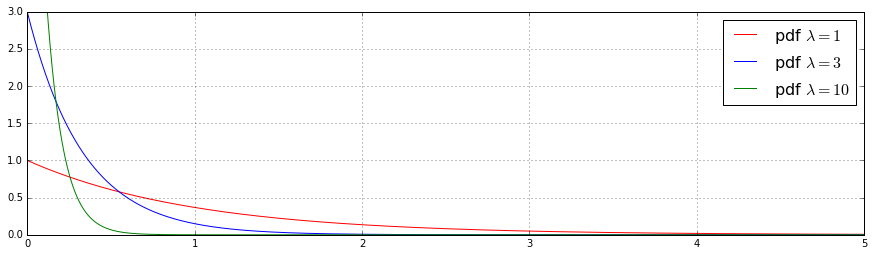

In [3]:
plt.figure(figsize=(15, 4))
for param, c in zip(lambds, colors):
    plt.plot(omega, sps.expon.pdf(x=omega, scale=1/param), 
            color=c, label='pdf $\\lambda={}$'.format(param))
plt.legend(fontsize=16)
plt.ylim((0, 3))
plt.grid(ls=':')
plt.show()

###### УМО №1

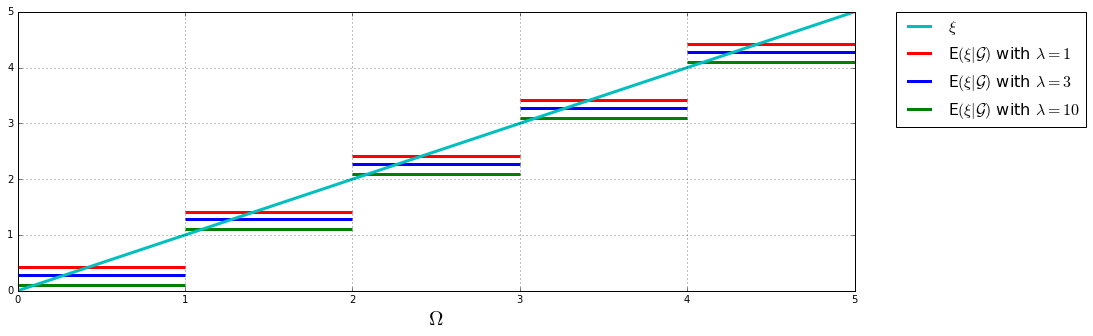

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(omega, omega, lw=3, color='c', label='$\\xi$')
for param, c in zip(lambds, colors):
    for n in conditions:  # события из сигма-алгебры
        plt.hlines(cond_exp(param, n), n-1, n, color=c, lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ with $\\lambda = ' + str(param) 
                          + '$') if n == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(ls=':')
plt.show()

######  УМО №2

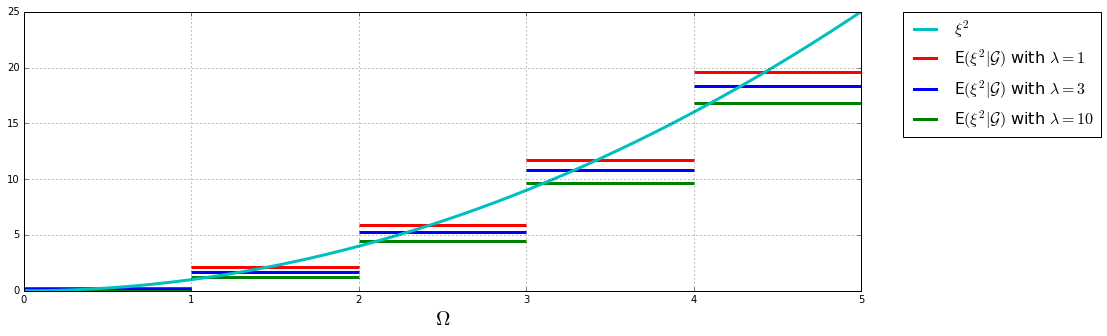

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(omega, omega**2, lw=3, color ='c', label='$\\xi^2$')
for param, c in zip(lambds, colors):
    for n in conditions:  # события из сигма-алгебры
        plt.hlines(cond_square_exp(param, n), n-1, n, color=c, lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ with $\\lambda = ' + str(param) 
                          + '$') if n == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(ls=':')
plt.show()

**Вывод:** Во-первых, на графиках проиллюстрирована справедливость утверждения для значения УМО при условии $\sigma()$ от счетного разбиения (константное значение на каждом множестве + нормированное).

Во-вторых, посмотрев на графики можно предположить, что верно свойство ${\sf E}({\sf E}(\xi | {\cal G})) = {\sf E}\xi $ (как известно из теории, оно выполнено всегда) и, как следствие, (но это уже почти не видно) справедливость интегрального условия.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

Из курса теорвера известно, что  $$p_{(\xi_1, \xi_2)} (x, y) = \frac{1}{2 \pi | \Sigma | ^ {\frac{1}{2}}}  e^{-\frac{1}{2} (\overline{x} - \mu)^{T} \Sigma^{-1} (\overline{x} - \mu)}$$

В нашем случае имеем $$ p_{(\xi_1, \xi_2)} (x, y) = \frac{1}{12 \pi} e^{-\frac{1}{36}(5x^2 - 8xy + 5y^2)}$$

Тогда, по определнию: $$p_{\xi_2}(y) = \int_{-\infty}^{\infty}p_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{12\sqrt{5\pi}} e ^ {-\frac{1}{20}y^2}$$

И в итоге: $$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}  = \frac{1}{6} \sqrt{\frac{5}{\pi}} e^{-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4}{45}y^2}$$

In [6]:
def cond_pdf(x, y):
    return 1/6 * np.sqrt(5/np.pi) * np.exp(-5/36 * x**2 + 2/9 * x*y - 4/45 * y**2)

x = np.linspace(-12, 12, 10000)
ys = [-3, 0, 1, 5]

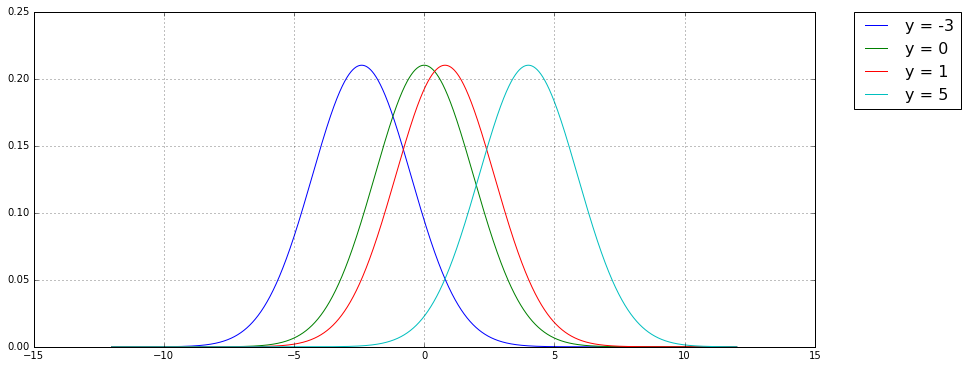

In [7]:
plt.figure(figsize=(14, 6))
for y in ys:
    plt.plot(x, cond_pdf(x, y), label="y = {}".format(y))
    
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(ls=':')
plt.show()

**Вывод:** По построенным графикам можно предположить, что $ \mathsf{E}(X_1 | X_2 = y) $ где $(X_1,\: X_2)$ --- гауссовский вектор, имеет нормальное распределение с мат.ожиданием $y$ и некоторой дисперсией, найти эти параметры можно, просто из формулы для плотности условного распределения.

Посмотрев в интернете, нашел, что это довольно известный факт: если $(X_1, X_2)^T \sim \mathcal{N}(a, \Sigma)$, где $a = (\mu_1,\: \mu_2)^T$ и $\Sigma = \begin{pmatrix}\sigma_{1}^2 & p\sigma_1 \sigma_2 \\ p\sigma_1 \sigma_2 & \sigma^{2}_{2}\end{pmatrix}$, то 
$$ \mathsf{E}(X_1 | X_2 = x_2) = \mu_1 + p \frac{\sigma_1}{\sigma_2} (x_2 - \mu_2)$$
и окончательно $$\mathsf{E} (X_1 | X_2) = p \frac{\sigma_1}{\sigma_2} X_2 + \mu_1 - p\frac{\sigma_1}{\sigma_2}\mu_2 $$ 
с чем, конечно же (это же теория), согласуются выводы, полученные из графика.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

Найдем предсказание:
$$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_s + N_t - N_s | N_s) = N_s + \mathsf{E}( N_t - N_s) = N_s + \lambda(t-s)$$

In [9]:
param = 1/4
t = 100
s = np.linspace(0, t, 5000)
lambds = [1/10, 1/4, 1/2, 1]

sample_150 = sps.expon.rvs(size=10, scale=1/param)
while np.sum(sample_150) < 150:  # делаю до 150 чтобы выборка была бОльшего размера
    sample_150 = np.concatenate([sample_150, sps.expon.rvs(size=10, scale=1/param)])

sample_100 = sps.expon.rvs(size=10, scale=1/param)
while np.sum(sample_100) < 100:  
    sample_100 = np.concatenate([sample_100, sps.expon.rvs(size=10, scale=1/param)])
    
N_100s = np.array(list(map( lambda s_once: len(sample_100[np.cumsum(sample_100) <= s_once]),
                        s)))
N_150s = np.array(list(map( lambda s_once: len(sample_150[np.cumsum(sample_150) <= s_once]),
                        s)))

sample_150, sample_100

(array([  7.06548533e+00,   3.12125261e-01,   1.83356937e+00,
          5.10404158e+00,   1.16747619e+01,   2.36972862e+01,
          6.82703653e-01,   3.43706238e+00,   1.32836015e+00,
          2.06153940e-02,   2.18703531e+00,   2.26608827e+00,
          7.16466472e+00,   2.17496170e+00,   1.13393035e+00,
          1.79512538e+00,   1.27335202e+00,   4.19089872e-01,
          1.99682074e+00,   2.27298015e+00,   3.74992151e+00,
          1.12900692e+00,   4.26990281e+00,   2.68522334e+00,
          4.43784490e+00,   1.80887242e-01,   2.39789017e+00,
          1.95935560e-01,   1.93345326e+00,   9.22769543e-01,
          1.09798645e+00,   1.05921148e+00,   6.48403995e+00,
          1.75251436e+00,   1.11729678e+01,   1.58600755e-01,
          4.14373371e+00,   2.26418988e+00,   9.84499413e+00,
          3.24740111e+00,   2.80724041e+00,   3.78664506e+00,
          3.09062665e+00,   2.56891757e+00,   1.04214572e+00,
          9.84729449e-02,   5.78159145e+00,   5.27928478e+00,
        

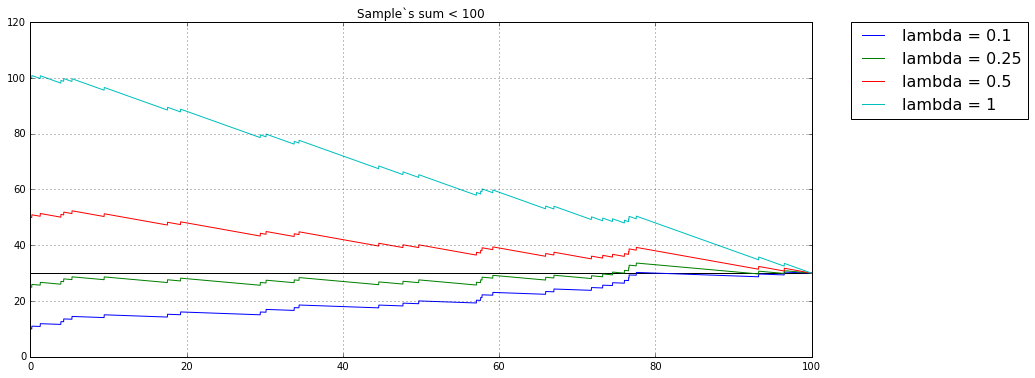

In [11]:
plt.figure(figsize=(14, 6))
for param in lambds:
    plt.plot(s, N_100s + param*(t - s), label='lambda = {}'.format(param))
    
plt.hlines(len(sample_100[np.cumsum(sample_100) <= 100]), 0, 100)

plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(ls=':')
plt.title('Sample`s sum < 100')
plt.show()

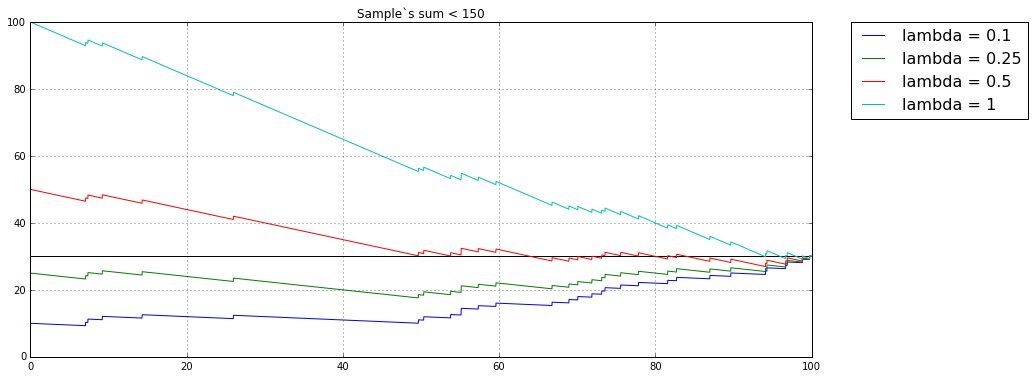

In [12]:

plt.figure(figsize=(14, 6))
for param in lambds:
    plt.plot(s, N_150s + param*(t - s), label='lambda = {}'.format(param))
    
plt.hlines(len(sample_150[np.cumsum(sample_150) <= 100]), 0, 100)

plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(ls=':')
plt.title('Sample`s sum < 150')
plt.show()

**Вывод:** как видно из двух графиков, для приведенных значений параметров наиболее близкое предсказание требуемой величины достигается при истинном значении параметра. Однако, не зависимо это этого, сходимость к настоящему значению можно наблюдать при любом значении параметра, причем чем сильнее параметр отличается от истинного, тем "быстрее" эта сходимость (в том смысле, что значения скорее приближаются к истинному. Это, однако, не сильно помогает, поскольку значения предсказаний тем быстрее приближаются к истинному, чем сильнее их параметр отличаются от истинного параметра)

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']  # выборка
y = data['target']  # номера компонент смеси

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [14]:
samples = [X[y == i] for i in range(0, 3)]
means = [np.mean(samples[i], axis=0) for i in range(0, 3)]
covs = [np.cov(samples[i].T) for i in range(0, 3)]

gausses = [sps.multivariate_normal(mean=means[i], cov=covs[i]) 
          for i in range(0, 3)]

for i in range(0, 3):
    print("\nТип {}:\n Mean = {}\n Cov_matrix = \n{}\n".format(i, means[i], covs[i]))


Тип 0:
 Mean = [ 5.006  3.418  1.464  0.244]
 Cov_matrix = 
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]


Тип 1:
 Mean = [ 5.936  2.77   4.26   1.326]
 Cov_matrix = 
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]


Тип 2:
 Mean = [ 6.588  2.974  5.552  2.026]
 Cov_matrix = 
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]



Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

In [15]:
def make_two_dim(mean, cov):
    return (mean[:2], cov[:2, :2])

gausses_two_dim = [sps.multivariate_normal(*make_two_dim(means[i], covs[i])) for i in range(0, 3)]

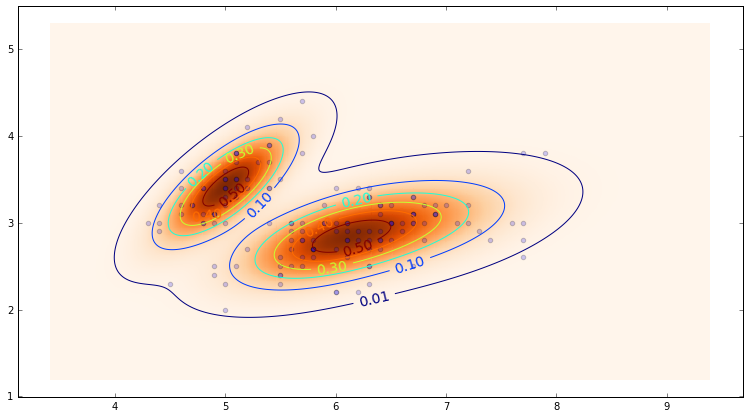

In [16]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3.42:9.4:1e-2, 1.2:5.3:1e-2]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
density = 1/3 * (gausses_two_dim[0].pdf(pos) + gausses_two_dim[1].pdf(pos) + gausses_two_dim[2].pdf(pos))

plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

Найдем для $k=1$ --- остальные аналогично.

\begin{align*}
   & \mathsf{E}\big(X | I(T \neq 1) \big) = \frac{{\sf E} X I\{T = 1\} }{\mathsf{P}(T=1)} I\{T = 1\} + \frac{{\sf E} X I\{T \neq 1\} }{\mathsf{P}(T\neq1)} I\{T \neq 1\} = \\
   & = 3 {\sf E} X I\{T = 1\} (1 - I\{T \neq 1\}) + \frac{3}{2} \left( {\sf E} X I\{T = 1\} + {\sf E} X I\{T = 1\}\right) I\{T \neq 1\} = \\
   & = \mu_1 (1 - I\{T \neq 1\}) + \frac{1}{2} (\mu_2 + \mu_3) I\{T \neq 1\}
\end{align*}

откуда, для $\{i, j, k\} = \{1, 2 ,3\}$ $$\mathsf{E} (X | I\{T \neq 1\} = 1) = \frac{1}{2} (\mu_2 + \mu_3)$$
$$ p_{X | I_{T \neq k}} (x | y) = p_k(x)(1-y) + \frac{1}{2} \left(p_i (x) + p_j(x)\right) \Rightarrow p_{X|I_{T \neq k}}(x|1) = \frac{1}{2}\left(p_i(x) + p_j(x)\right)$$

In [1]:
densities_2d = [1/2 *  ( gausses_two_dim[(i+1) % 3].pdf(pos) + gausses_two_dim[(i+2) % 3].pdf(pos)) 
               for i in range(0, 3)]

plt.figure(figsize=(17, 19))

for i, density in enumerate(densities_2d):
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    #plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.5, 0.7])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

NameError: name 'gausses_two_dim' is not defined

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
def get_argmax(x):
    return np.argmax(np.array([gausses[0].pdf(x), 
                               gausses[1].pdf(x), 
                               gausses[2].pdf(x)]))


y_prediction = np.array(list(map(lambda x:
                                get_argmax(x), X)))

print('Accuracy score y_prediction and y is: {}'.format(accuracy_score(y_prediction, y)))

def get_indexed_density(mean, cov, ind_1, ind_2):
    mean_ans = mean[[ind_1, ind_2]]
    cov_ans = np.array([ [ cov[ind_1][ind_1], cov[ind_1][ind_2] ], 
                         [cov[ind_2][ind_1], cov[ind_2][ind_2]  ] ])
    return (mean_ans, cov_ans)

def draw_colors(grid, density_1, density_2, density_3):
    pos = np.empty(grid[0].shape + (2,))
    pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
    colors = np.array(list(map(lambda x:  np.argmax(x), 
                               np.hstack((density_1.pdf(pos).reshape(-1, 1), 
                                          density_2.pdf(pos).reshape(-1, 1), 
           density_3.pdf(pos).reshape(-1, 1))))))
    return colors.reshape(grid[0].shape)

def find_bounds(x, y):
    return [np.min(x), np.max(x), np.min(y), np.max(y)]

Accuracy score y_prediction and y is: 0.98


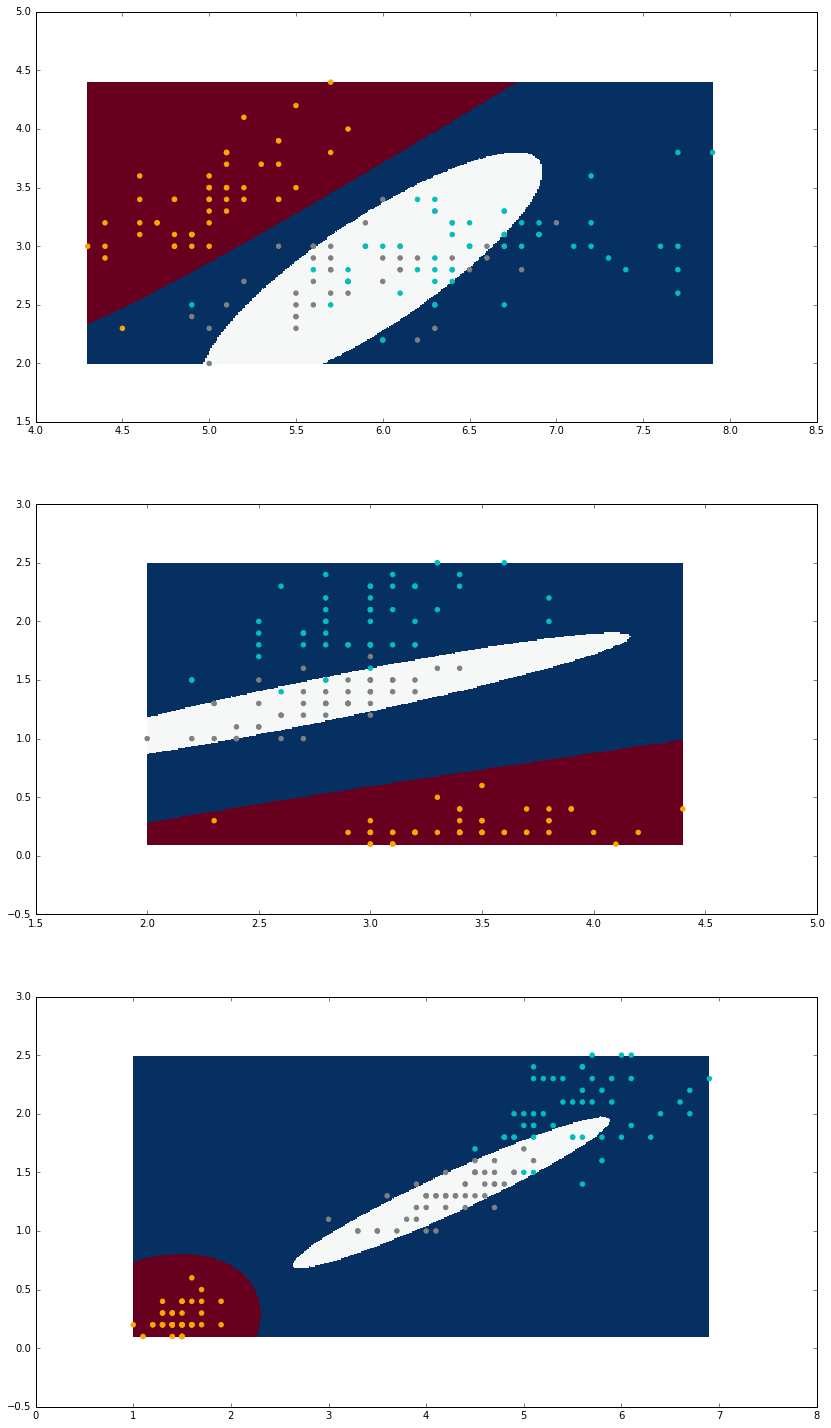

In [20]:
plt.figure(figsize=(14, 25))
for i, indexes in enumerate([(0, 1), (1, 3), (2, 3)]): 
    x_min, x_max, y_min, y_max = find_bounds(X[:, indexes[0]], X[:, indexes[1]])
    grid = np.mgrid[x_min:x_max:1e-2, y_min:y_max:1e-2]
    colors = draw_colors(grid, 
                         sps.multivariate_normal(*get_indexed_density(means[0], covs[0], *indexes)), 
                         sps.multivariate_normal(*get_indexed_density(means[1], covs[1], *indexes)), 
                         sps.multivariate_normal(*get_indexed_density(means[1], covs[2], *indexes)))
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], colors, cmap='RdBu')
    colors_map = ['orange', 'grey', 'c']
    plt.scatter(X[:, indexes[0]], X[:, indexes[1]], color=list(map(lambda y_once: colors_map[y_once], y)))
plt.show()

**Вывод:** ...

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

### Описание работы EM-алгоритма:

ЕМ-алгоритм --- алгоритм кластеризации данных. Алгоритм используется в ситуации, когда основное распределение выборки является смесью некоторых элементарных распределений (в частном случае --- многомерных нормальных), т.е. в ситуациях, когда плотность имеет следующий вид(для дискретной смеси): $$ X \sim \sum\limits_{j=0}^{n}w_j p(x | \theta_j),\quad \sum w_j = 1;\: w_j \ge 0$$

Задача алгоритма заключается в том, чтобы оценить вектор параметров $(w_1,\:\ldots,\: w_n,\: \theta_1,\:\ldots,\:\theta_n)$, имея выборку $X$ из приведенного распределения.

##### Область применения, основная идея:

При применении стандартного метода м.п. возникнет сложность --- придется находить экстремумы функции вида \begin{align} \sum\limits_{i=1}^{n} \log \left( \sum\limits_{j=0}^{l} w_j p(x_i | \theta_j)\right)\end{align}
что достаточно сложно оптимизировать, поэтому основная идея заключается в том, чтобы перейти от функционала вида "сумма логарифмов" к более простому для оптимизации.

##### Суть алгоритма

Переход к более простому функционалу основан на следующей идее: при знании того, какой элемент выборки принадлежит той или иной компоненте смеси (т.е. при умении вычислять функцию $j(i)$) функия правдоподобия приняла бы куда более простой вид: $$ \sum\limits_{i=1}^{n} \log \left( w_{j(i)} p(x_i | \theta_{j(i)})\right)$$

для реализации этого вводится вектор *ненаблюдаемых (латентных)* переменных $Z$, содержащей информацию о принадлежности элементов выборки компонентам смеси. Сначала задается некоторое начальное приближение, а далее, до наступления сходимости, по очереди выполняются две фазы: фаза **Е(expectation)** и фаза **М(maximization)**

##### Фаза E

На этом шаге алгоритма вычисляется математическое ожидание латентных переменных $Z$ на основании текущей оценки вектора параметров. Пусть $z_{ij}:= {\sf P}(\theta_j | x_i)$ --- вероятность того, что $i$-тый объект получен из $j$-компоненты смеси. Тогда, зная их и формулу $$p(x, \theta_j) = p(x)P(\theta_j | x) = w_jp_j(x) $$
легко найти функцию правдоподобия.

Оценка на скрытые переменные получается следующим образом:

известно, что $\sum\limits_{j=0}^{n}z_{ij} = 1$ --- поскольку это вероятность принадлежности $i$-го объекта выборке $X$. Тогда, по формуле Байеса, имеем $$z_{ij} = \frac{w_j p_j(x_i)}{\sum\limits_{s=0}^{n}w_s p_{s}(x_i)}$$

Таким образом, зная значения $z_{ij}$ и используя формулу выше функция правдоподобия приобретает вид, пригодный для анализа и начинается шаг **M**.

В нашем частном случае, в формулу для $g_{ij}$ нужно подставить плотность i-ого многомерного нормального распределения, параметры которого мы оценили на M-шаге (или начальными приближениями).

(вкратце, на этом шаге оценивается распределение $Z$ по формуле $p(Z | X,\: \omega,\:  w) = \frac{\displaystyle p(X, Z | \omega, \theta) }{\displaystyle \sum\limits_{Z} p(X, Z| \omega, \theta)}$)


##### Фаза M

На этом шаге, зная оценку для вектора скрытых переменных $Z$, просто находится текущая оценка параметров $(w_1,\:\ldots,\: w_n,\: \theta_1,\ldots,\: \theta_n) = \Theta$. 

$$\arg \max\limits_{\Theta}\mathcal{L}(\Theta) = \arg \max\limits_{\Theta} \sum\limits_{i = 1}^{n}  \ln p(x_i) = \arg \max\limits_{\Theta} \sum\limits_{i = 1}^{n} \ln \left(\sum\limits_{j = 1}^{k} w_jp_j(x_i) \right)$$

где сумма под логарифмом выражается через значения $z_{ij}$, подсчитанными на предыдущем шаге. Тогда, в общем виде, имеем ответ на шаге **M**: $$ w_j = \frac{1}{n}\sum\limits_{i=1}^{n} z_{ij}$$
$$ \theta_j = \arg \max\limits_{\theta} \sum\limits_{i=1}^{n} g_{ij} \ln \varphi(x_i, \theta) $$

Таким образом, алгоритм поочередно выполняет шаги **E**, **M** до наступления сходимости (параметр *tol*)

In [41]:

from sklearn.mixture import GaussianMixture

estimator = GaussianMixture(n_components=3, n_init=20, tol=1e-5, max_iter=1000)
estimator.fit(X)
y_prediction = estimator.predict(X)

В процессе работы ЕМ выдавал свои метки классам (а значит, возможно, отличающиеся от наших), поэтому нужно проитерироваться по всем возможным перестановкам меток и найдем ту перестановку, где скор максимален --- это и будет скор классификации ЕМ-алгоритма

In [38]:
import itertools

In [39]:
scores = []
for permutation in itertools.permutations(range(3), 3):
    y_pred_perm = y_prediction.copy()
    y_pred_perm[y_prediction == 0] = permutation[0]
    y_pred_perm[y_prediction == 1] = permutation[1]
    y_pred_perm[y_prediction == 2] = permutation[2]
    scores.append(accuracy_score(y_pred_perm, y))
max(scores)

0.96666666666666667